<a href="https://colab.research.google.com/github/suri199507/demo/blob/master/incedo_machionelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


 

    100% |████████████████████████████████| 993kB 10.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
download = drive.CreateFile({'id':'1jg44IrSKH0NpjwUOVFEA_uHZD6OrguGl'})
download.GetContentFile('train_file.csv')

In [0]:


download = drive.CreateFile({'id':'1XBtUND7SMKtEXDkeBatsGPS4ViBrKM6f'})
download.GetContentFile('test_file.csv')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

predicting adduction probability drug  , The  target varable is  Greater_Risk_Probability

In [0]:
train=pd.read_csv("train_file.csv")
test=pd.read_csv("test_file.csv")

In [0]:
train.head()

,Patient_ID,YEAR,LocationDesc,Subtopic,Greater_Risk_Question,Description,Sample_Size,Sex,Race,Grade,GeoLocation,QuestionCode,StratID1,StratID2,StratID3,StratificationType,Greater_Risk_Probability
0,1,1995,"Houston, TX",1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",335.0,Female,Hispanic or Latino,4,"(29.760427, -95.369803)",H49,1,4,0,Local,7.4793
1,2,1997,"Houston, TX",0,Currently drank alcohol,"at least one drink of alcohol, on at least 1 d...",382.0,Total,Black or African American,4,"(29.760427, -95.369803)",H42,0,3,0,Local,49.6852
2,3,1993,Nevada,0,Had their first drink of alcohol before age 13...,other than a few sips,196.0,Female,White,0,"(39.493240390000494, -117.07184056399967)",H41,1,6,2,State,47.8132
3,4,2017,Pennsylvania,1,Ever used cocaine,"any form of cocaine, such as powder, crack, or...",104.0,Male,Asian,4,"(40.79373015200048, -77.86070029399963)",H49,2,2,0,State,3.4554
4,5,2007,"San Francisco, CA",1,Ever took steroids without a doctor's prescrip...,"pills or shots, one or more times during their...",100.0,Female,Multiple Race,4,"(37.77493, -122.419416)",H55,1,7,0,Local,0.0000


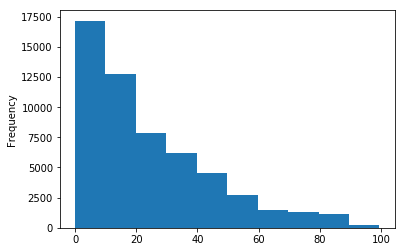

In [0]:


train['Greater_Risk_Probability'].plot.hist()

In [0]:


train['GeoLocation']=train['GeoLocation'].astype(str)
train['GeoLocation'] = train['GeoLocation'].map(lambda x: x.strip())

#Next we split and expand the column into 2 columns:
train[['longtitude','latitude']] = train['GeoLocation'].str.split(' ',n=1,expand=True)

test['GeoLocation']=test['GeoLocation'].astype(str)
test['GeoLocation'] = test['GeoLocation'].map(lambda x: x.strip())

#Next we split and expand the column into 2 columns:
test[['longtitude','latitude']] = test['GeoLocation'].str.split(' ',n=1,expand=True)


In [0]:
train['longtitude'] = train['longtitude'].str.replace('longtitude','')
train['latitude'] = train['latitude'].str.replace('latitude','')


test['longtitude'] = test['longtitude'].str.replace('longtitude','')
test['latitude'] = test['latitude'].str.replace('latitude','')


In [0]:
train['longtitude']=train['longtitude'].str.replace("[\(,]", "", regex=True).astype(float)
train['latitude']= train["latitude"].str.rstrip(")").astype(float)

test['longtitude']=test['longtitude'].str.replace("[\(,]", "", regex=True).astype(float)
test['latitude']= test["latitude"].str.rstrip(")").astype(float)

In [0]:
train_df=train.drop(['GeoLocation'],axis=1)
test_df=test.drop(['GeoLocation'],axis=1)

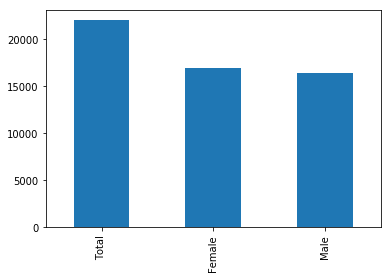

In [0]:
train['Sex'].value_counts().plot.bar()

Here drug adducation is  equal in male and feamle 

In [0]:
train_df['age']=(2019-train_df['YEAR'])

In [0]:
test_df['age']=(2019-test_df['YEAR'])

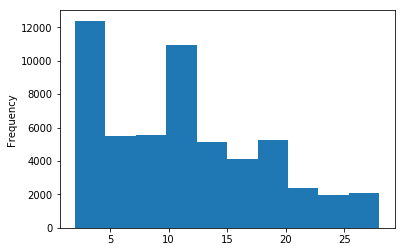

In [0]:
train_df['age'].plot.hist()

In [0]:
train_df['Greater_Risk_Question'].unique()

array(['Ever used cocaine', 'Currently drank alcohol',
       'Had their first drink of alcohol before age 13 years',
       "Ever took steroids without a doctor's prescription",
       'Ever used inhalants',
       'Were offered, sold, or given an illegal drug on school property',
       'Ever used marijuana', 'Ever used heroin', 'Ever drank alcohol',
       'Currently used marijuana', 'Ever used synthetic marijuana',
       'Tried marijuana for the first time before age 13 years',
       'Ever used methamphetamines', 'Ever injected any illegal drug',
       'Ever used ecstasy',
       'Reported 10 or more as the largest number of drinks they had in a row',
       'Usually got the alcohol they drank by someone giving it to them',
       "Ever took prescription pain medicine without a doctor's prescription or differently than how a doctor told them to use it",
       'Ever used hallucinogenic drugs',
       'Reported current binge drinking'], dtype=object)

In [0]:
train_df['Greater_Risk_Question'].replace({"Ever used cocaine":"Very High Risk","Currently drank alcohol":"High Risk","Had their first drink of alcohol before age 13 years":"Very Low Risk",
                                        "Ever took steroids without a doctor's prescription":" very High Risk","Ever used inhalants":" High Risk",
                                          "Were offered, sold, or given an illegal drug on school property":" very High Risk","Ever used marijuana":"Medium Risk",
                                         "Ever used heroin":"Very High Risk","Ever drank alcohol":"Medium Risk","Currently used marijuana":"Very High Risk",
                                          "Tried marijuana for the first time before age 13 years":" High Risk","Tried marijuana for the first time before age 13 years":"Very High Risk",
                                         "Ever used methamphetamines":"High Risk","Ever injected any illegal drug":"High Risk","Ever used ecstasy":"Low Risk",
                                         "Reported 10 or more as the largest number of drinks they had in a row":"High Risk",
                                          "Usually got the alcohol they drank by someone giving it to them":"High Risk",
                                         "Ever took prescription pain medicine without a doctor's prescription or differently than how a doctor told them to use it":"Low Risk",
                                          "Ever used hallucinogenic drugs":"Very High Risk","Reported current binge drinking":"Medium Risk"})


train_df['Very Low Risk']=np.where(train_df['Greater_Risk_Question'].str.contains('Very Low Risk'),1,0)
train_df['Very High Risk']=np.where(train_df['Greater_Risk_Question'].str.contains('Very High Risk'),1,0)
train_df['High Risk']=np.where(train_df['Greater_Risk_Question'].str.contains('High Risk'),1,0)
train_df['Medium Risk']=np.where(train_df['Greater_Risk_Question'].str.contains('Medium Risk'),1,0)
train_df['Low Risk']=np.where(train_df['Greater_Risk_Question'].str.contains('LOw Risk'),1,0)


In [0]:
test_df['Greater_Risk_Question'].replace({"Ever used cocaine":"Very High Risk","Currently drank alcohol":"High Risk","Had their first drink of alcohol before age 13 years":"Very Low Risk",
                                        "Ever took steroids without a doctor's prescription":" very High Risk","Ever used inhalants":" High Risk",
                                          "Were offered, sold, or given an illegal drug on school property":" very High Risk","Ever used marijuana":"Medium Risk",
                                         "Ever used heroin":"Very High Risk","Ever drank alcohol":"Medium Risk","Currently used marijuana":"Very High Risk",
                                          "Tried marijuana for the first time before age 13 years":" High Risk","Tried marijuana for the first time before age 13 years":"Very High Risk",
                                         "Ever used methamphetamines":"High Risk","Ever injected any illegal drug":"High Risk","Ever used ecstasy":"Low Risk",
                                         "Reported 10 or more as the largest number of drinks they had in a row":"High Risk",
                                          "Usually got the alcohol they drank by someone giving it to them":"High Risk",
                                         "Ever took prescription pain medicine without a doctor's prescription or differently than how a doctor told them to use it":"Low Risk",
                                          "Ever used hallucinogenic drugs":"Very High Risk","Reported current binge drinking":"Medium Risk"})


test_df['Very Low Risk']=np.where(test_df['Greater_Risk_Question'].str.contains('Very Low Risk'),1,0)
test_df['Very High Risk']=np.where(test_df['Greater_Risk_Question'].str.contains('Very High Risk'),1,0)
test_df['High Risk']=np.where(test_df['Greater_Risk_Question'].str.contains('High Risk'),1,0)
test_df['Medium Risk']=np.where(test_df['Greater_Risk_Question'].str.contains('Medium Risk'),1,0)
test_df['Low Risk']=np.where(test_df['Greater_Risk_Question'].str.contains('LOw Risk'),1,0)


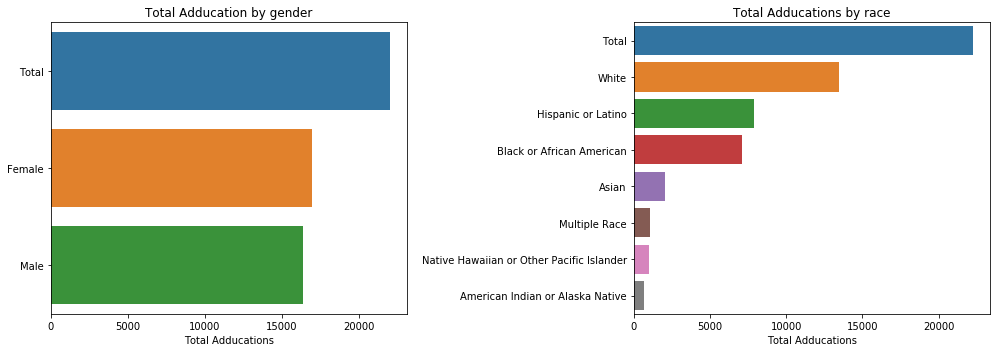

In [0]:
gender_counts = train_df['Sex'].value_counts()
race_counts = train_df['Race'].value_counts()
fig, (ax, ax1) = plt.subplots(1, 2, figsize=[14, 5])
sns.barplot(x=gender_counts, y=gender_counts.index, ax=ax)
sns.barplot(x=race_counts, y=race_counts.index, ax=ax1)
ax.set_title('Total Adducation by gender')
ax.set_xlabel('Total Adducations')
ax1.set_title('Total Adducations by race')
ax1.set_xlabel('Total Adducations')
plt.tight_layout()
plt.show()

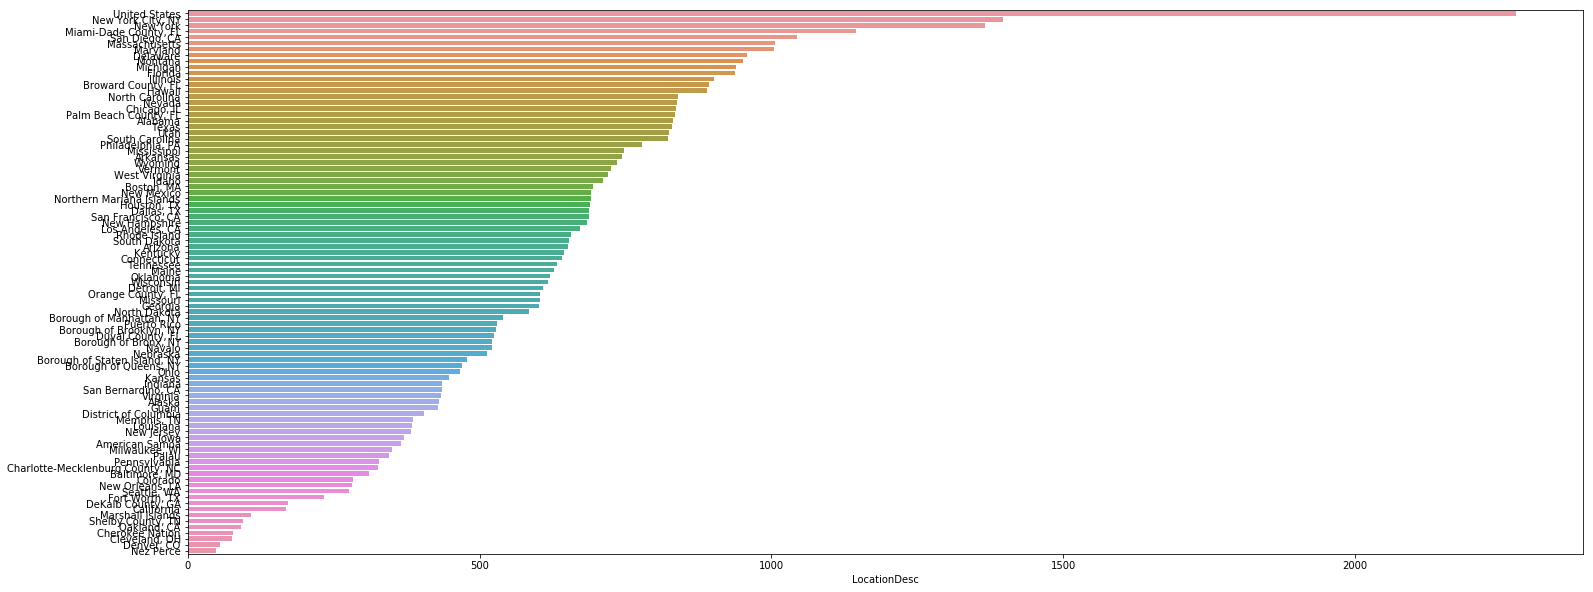

In [0]:

f, (ax) = plt.subplots(1, figsize=(25, 10), sharex=True)
Location=train_df['LocationDesc'].value_counts()

sns.barplot(x=Location, y=Location.index)


In [0]:
train_df=train_df.drop(["Greater_Risk_Question","Description"],axis=1)

In [0]:
test_df=test_df.drop(["Greater_Risk_Question","Description"],axis=1)

In [0]:
mylist=list(train_df.select_dtypes(include=['object']).columns)
mylist

['LocationDesc', 'Sex', 'Race', 'QuestionCode', 'StratificationType']

In [0]:
mylist1=list(test_df.select_dtypes(include=['object']).columns)
mylist1

['LocationDesc', 'Sex', 'Race', 'QuestionCode', 'StratificationType']

In [0]:
dummies=pd.get_dummies(train_df[mylist], prefix=mylist)
train_df.drop(mylist, axis=1, inplace=True)
train_df=pd.concat([train_df,dummies], axis=1)

In [0]:
dummies1=pd.get_dummies(test_df[mylist1], prefix=mylist1)
test_df.drop(mylist1, axis=1, inplace=True)
test_df=pd.concat([test_df,dummies1], axis=1)

In [0]:
test_df=test_df.fillna(0)
test_df.head(2)
train_df=train_df.fillna(0)
train_df.head(2)

,Patient_ID,YEAR,Subtopic,Sample_Size,Grade,StratID1,StratID2,StratID3,Greater_Risk_Probability,longtitude,...,QuestionCode_H55,QuestionCode_H56,QuestionCode_H57,QuestionCode_H58,QuestionCode_QNHALLUCDRUG,StratificationType_Local,StratificationType_National,StratificationType_Other,StratificationType_State,StratificationType_Territory
0,1,1995,1,335.0,4,1,4,0,7.4793,29.760427,...,0,0,0,0,0,1,0,0,0,0
1,2,1997,0,382.0,4,0,3,0,49.6852,29.760427,...,0,0,0,0,0,1,0,0,0,0


In [0]:
y=train_df['Greater_Risk_Probability']
X_data=train_df.drop(['Greater_Risk_Probability'],axis=1)
X=X_data.drop(['Patient_ID'],axis=1)
test_data=test_df.drop(['Patient_ID'],axis=1)

In [0]:
train_data=train_df.drop(['Patient_ID'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2018)

In [0]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())
my_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_s...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [0]:
!pip install CatBoost

    100% |████████████████████████████████| 60.6MB 602kB/s 


In [0]:
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=3500, depth=13, learning_rate=1, loss_function='RMSE')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 8.8522394	test: 8.8877852	best: 8.8877852 (0)	total: 823ms	remaining: 48m
1:	learn: 6.9962345	test: 7.1567093	best: 7.1567093 (1)	total: 1.46s	remaining: 42m 26s
2:	learn: 6.5543485	test: 6.7612071	best: 6.7612071 (2)	total: 2.16s	remaining: 42m
3:	learn: 6.0504194	test: 6.3282659	best: 6.3282659 (3)	total: 2.85s	remaining: 41m 31s
4:	learn: 5.8201516	test: 6.1153374	best: 6.1153374 (4)	total: 3.57s	remaining: 41m 38s
5:	learn: 5.8201279	test: 6.1152621	best: 6.1152621 (5)	total: 3.59s	remaining: 34m 52s
6:	learn: 5.8201279	test: 6.1152621	best: 6.1152621 (6)	total: 3.61s	remaining: 30m 1s
7:	learn: 5.7901850	test: 6.0861206	best: 6.0861206 (7)	total: 3.73s	remaining: 27m 8s
8:	learn: 5.5679916	test: 5.9048844	best: 5.9048844 (8)	total: 4.43s	remaining: 28m 39s
9:	learn: 5.4604695	test: 5.8096161	best: 5.8096161 (9)	total: 5.15s	remaining: 29m 57s
10:	learn: 5.4593059	test: 5.7990570	best: 5.7990570 (10)	total: 5.17s	remaining: 27m 21s
11:	learn: 5.4588675	test: 5.7928816	bes

In [0]:
pred1=model_cat.predict(X_test)

In [0]:
def rmsle(y_test, pred1):
    
    return np.sqrt(np.mean(np.square((y_test) - (pred1))))

In [0]:
pred=model.predict(test_data)

In [0]:
from google.colab import files
loaded=files.upload()

Saving sample_submission08f968d49116f6.csv to sample_submission08f968d49116f6.csv


In [0]:
sub=pd.read_csv("sample_submission08f968d49116f6.csv")

In [0]:
submission.head()

,Patient_ID,Greater_Risk_Probability
0,55400,63.261831
1,55401,26.970066
2,55402,55.762009
3,55403,19.408863
4,55404,7.982813


In [0]:
submission=pd.DataFrame({"Patient_ID":test['Patient_ID'],"Greater_Risk_Probability":pred})


In [0]:
submission.to_csv('catboost.csv', header=True, index=False)


from google.colab import files
files.download('catboost.csv') 